# Keybindings 

 - SHIFT + ENTER (aka Return) => Evaluate current cell 
 - ESC a => Insert cell above current cell (Input)
 - ESC b => Insert cell below current cell 
 - ESC m => Set current cell as markdown 
 - ESC y => Set current cell as code 
 - ESC d d => Delete current cell 
 - SHIFT + TAB => Shows the documentation for the symbol at current cursor position
 - \ GREEk-LETTER-NAME + TAB => Insert greek letter, for instance '\alpha + TAB' becomes 'α'
 
 
 See more at: 
   
   - https://www.analyticsvidhya.com/blog/2018/05/starters-guide-jupyter-notebook/ 
   
   - https://www.thesoftwareguild.com/blog/environment-magic-with-jupyter-and-docker/
   
   - https://blog.jupyter.org/99-ways-to-extend-the-jupyter-ecosystem-11e5dab7c54
   
   - http://hua-zhou.github.io/teaching/biostatm280-2019spring/slides/03-repres/repres.html
   
   
   

## Load Julia Magic

In [1]:
# %load_ext julia.magic
# IJulia.magic()

### Julia Supports Greek Letters

In [2]:
# type \(backward slash) followed by the letter name 'alpha' and \alpha and then type <TAB>
α = 2.5; β = 5.6; 
ζ = α + β

8.1

Value of zeta:

In [3]:
ζ

8.1

# Check workspace variables

In [4]:
varinfo()

| name |    size | summary |
|:---- | -------:|:------- |
| Base |         | Module  |
| Core |         | Module  |
| Main |         | Module  |
| α    | 8 bytes | Float64 |
| β    | 8 bytes | Float64 |
| ζ    | 8 bytes | Float64 |


### Vectors

In [5]:
 xs = [1.0 2.0 5.6 10.6 8.5]

1×5 Array{Float64,2}:
 1.0  2.0  5.6  10.6  8.5

In [6]:
typeof(xs) # Get type of xs

Array{Float64,2}

In [7]:
xs[1] # Element 1 (first element, arrays one-based, not zero based)

1.0

In [8]:
xs[3] 

5.6

In [9]:
3.5 * xs # Scaling 

1×5 Array{Float64,2}:
 3.5  7.0  19.6  37.1  29.75

In [10]:
10.5 .+ xs # Sum 10.5 to all array elements

1×5 Array{Float64,2}:
 11.5  12.5  16.1  21.1  19.0

In [11]:
10.5 .+ 3.5 * xs # Scaling and summation 

1×5 Array{Float64,2}:
 14.0  17.5  30.1  47.6  40.25

## Apply Function to array/Vector

In [12]:
exp(xs[1])

2.718281828459045

In [13]:
exp.(xs) # Apply Function to all elements 

1×5 Array{Float64,2}:
 2.71828  7.38906  270.426  40134.8  4914.77

In [14]:
log.(xs) # Apply log to all array elements 

1×5 Array{Float64,2}:
 0.0  0.693147  1.72277  2.36085  2.14007

## Get transpose of vector and matrix 

In [15]:
[1.23 2.5 8.25 10.52 -56.23]'

5×1 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
   1.23
   2.5 
   8.25
  10.52
 -56.23

In [16]:
m = [ [3 10 5]; [ 9 8 10] ; [10 5 6]]

3×3 Array{Int64,2}:
  3  10   5
  9   8  10
 10   5   6

In [17]:
m' # Tranpose of matrix m 

3×3 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
  3   9  10
 10   8   5
  5  10   6

# Creating Functions

## Functions of single line

In [18]:
f(x) = -100 + 5x + 4x^2

f (generic function with 1 method)

In [19]:
f(5)

25

In [20]:
f(8)

196

In [21]:
f.([1 2 3 4 5 6])

1×6 Array{Int64,2}:
 -91  -74  -49  -16  25  74

In [22]:
f.(-5:1:5)

11-element Array{Int64,1}:
  -25
  -56
  -79
  -94
 -101
 -100
  -91
  -74
  -49
  -16
   25

## Functions of multiple lines

In [23]:
# Evaluate polynomial 
# Coeffs is an array [a0 a1 a2 ... aN-1]
# P(x) = a0 + a1 * x + a2 * x2^2 + ... + aN-1 * x^(N - 1)
function polyval(coeffs, x)
   s = 0.0 
   p = 1.0 
   for c  in coeffs
        s = s + c * p 
        p = p * x       
   end 
   return s
end 

polyval (generic function with 1 method)

Evaluate polynomial P(x) = 10 + 4x + 6x^2 + 5x^3 at x = 0; x = 1 and x = 3

In [24]:
# At x = 0 
polyval([10 4 6 5], 0.0)

10.0

In [25]:
# At x = 1
polyval([10 4 6 5], 1.0)

25.0

In [26]:
# At x = 3
polyval([10 4 6 5], 3.0)

211.0

In [27]:
# Testing 
p(x) = 10 + 4x + 6x^2 + 5x^3 

p (generic function with 1 method)

In [28]:
p(3)

211

## Function with type annotation

In [29]:
function linearcomb(x::Float64, a::Float64, b::Float64)
    return a * x + b
end    

linearcomb (generic function with 1 method)

In [30]:
linearcomb(3.0, 5.0, 10.0)

25.0

Show help

In [31]:
? linearcomb

search: linearcomb LinearIndices



No documentation found.

`linearcomb` is a `Function`.

```
# 1 method for generic function "linearcomb":
[1] linearcomb(x::Float64, a::Float64, b::Float64) in Main at In[29]:2
```


# Lambda Functions

In [32]:
lam1 = x -> 3 * x + 5

#3 (generic function with 1 method)

In [33]:
lam1(5.0)

20.0

In [34]:
4.0 + 2. * 5.2 |> lam1 # Reverse function application

48.2

Vectorizing function (applying it to an array)

In [35]:
lam1.([1 2 3 4 5 6])

1×6 Array{Int64,2}:
 8  11  14  17  20  23

Reverse function application to an array

In [36]:
[1 2 3 3 4 5 6] .|> lam1 

1×7 Array{Int64,2}:
 8  11  14  14  17  20  23

## Higher Order Function

Functional programming: Functions that takes functions as arguments 
and/or return functions from functions.

In [37]:
# Returns a function that evaluates polynomial 
# Coeffs is an array [a0 a1 a2 ... aN-1]
# P(x) = a0 + a1 * x + a2 * x2^2 + ... + aN-1 * x^(N - 1)
function make_polyval(coeffs)
   fun = x -> begin
       s = 0.0 
       p = 1.0 
       for c  in coeffs
            s = s + c * p 
            p = p * x       
       end 
       return s
    
    end
   
    return fun
end 

make_polyval (generic function with 1 method)

Create a function poly1(x) that evaluates the polynomial 10 + 4x + 6x^2 + 5x^3 

In [38]:
poly1 = make_polyval([10 4 6 5])

#5 (generic function with 1 method)

In [39]:
poly1(0)

10.0

In [40]:
poly1(3.0)

211.0

In [41]:
poly1.([-2.0 0.0 1.0 2.0 3.0])

1×5 Array{Float64,2}:
 -14.0  10.0  25.0  82.0  211.0

In [42]:
# Reverse function Application
[-2.0 0.0 1.0 2.0 3.0] .|> poly1

1×5 Array{Float64,2}:
 -14.0  10.0  25.0  82.0  211.0

# Plotting with Plots package

In [43]:
import Plots

Plot the function cos(x) within the range -pi to pi with step 0.1

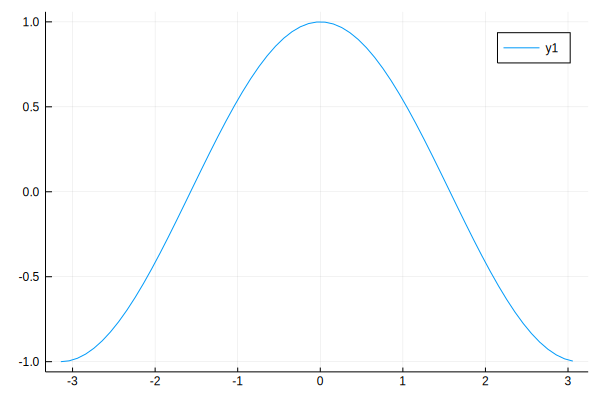

In [44]:
Plots.plot(cos, -pi:0.1:pi)

## Symbolic Math with Sympy



In [45]:
using SymPy

In [46]:
@syms x y 

(x, y)

In [47]:
x

x

In [48]:
typeof(x)

Sym

In [49]:
eq1 = 10x^3 - 5x^2 + 20

    3      2     
10⋅x  - 5⋅x  + 20

First derivate

In [50]:
diff(eq1, x) 

    2       
30⋅x  - 10⋅x

Evaluate symbolic expression 'eq1'

In [51]:
subs(eq1, x, 2.0)

80.0000000000000

In [52]:
subs(eq1, x, 2.5)

145.000000000000

In [53]:
subs(eq1, x, y - 4)

          3            2     
10⋅(y - 4)  - 5⋅(y - 4)  + 20

Attempt to find real roots of equation eq1(x) = 0

In [54]:
real_roots(eq1) |> float 

1-element Array{Float64,1}:
 -1.1133861900648112

Expand symbolic Expression

In [55]:
expand( (x + 1)^3 )

 3      2          
x  + 3⋅x  + 3⋅x + 1

In [56]:
(x + 1)^3 |> expand # OR 

 3      2          
x  + 3⋅x  + 3⋅x + 1